Brain_Tumor_Classification using CNN

Step - 1 : Loading the Dataset and Creating new directories for storing preprocessed dataset images

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create directories for training data
/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI\glioma_tumor')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI\meningioma_tumor')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI\pituitary_tumor')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI\no_tumor')


# Create directories for testing data
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data\glioma_tumor')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data\meningioma_tumor')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data\pituitary_tumor')
os.mkdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data\no_tumor')


# Set directories for training and testing data
train_dir = r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\dataset\Brain-MRI\Training'
test_dir = r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\dataset\Brain-MRI\Testing'

classes = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
# Populate file paths for training data
files_path_dict = {}

for c in classes:
    class_dir = os.path.join(train_dir, c)
    files_path_dict[c] = [os.path.join(class_dir, x) for x in os.listdir(class_dir)]

# Print the dictionary containing file paths for each class
print(files_path_dict)


Randomly printing the intial dataset images

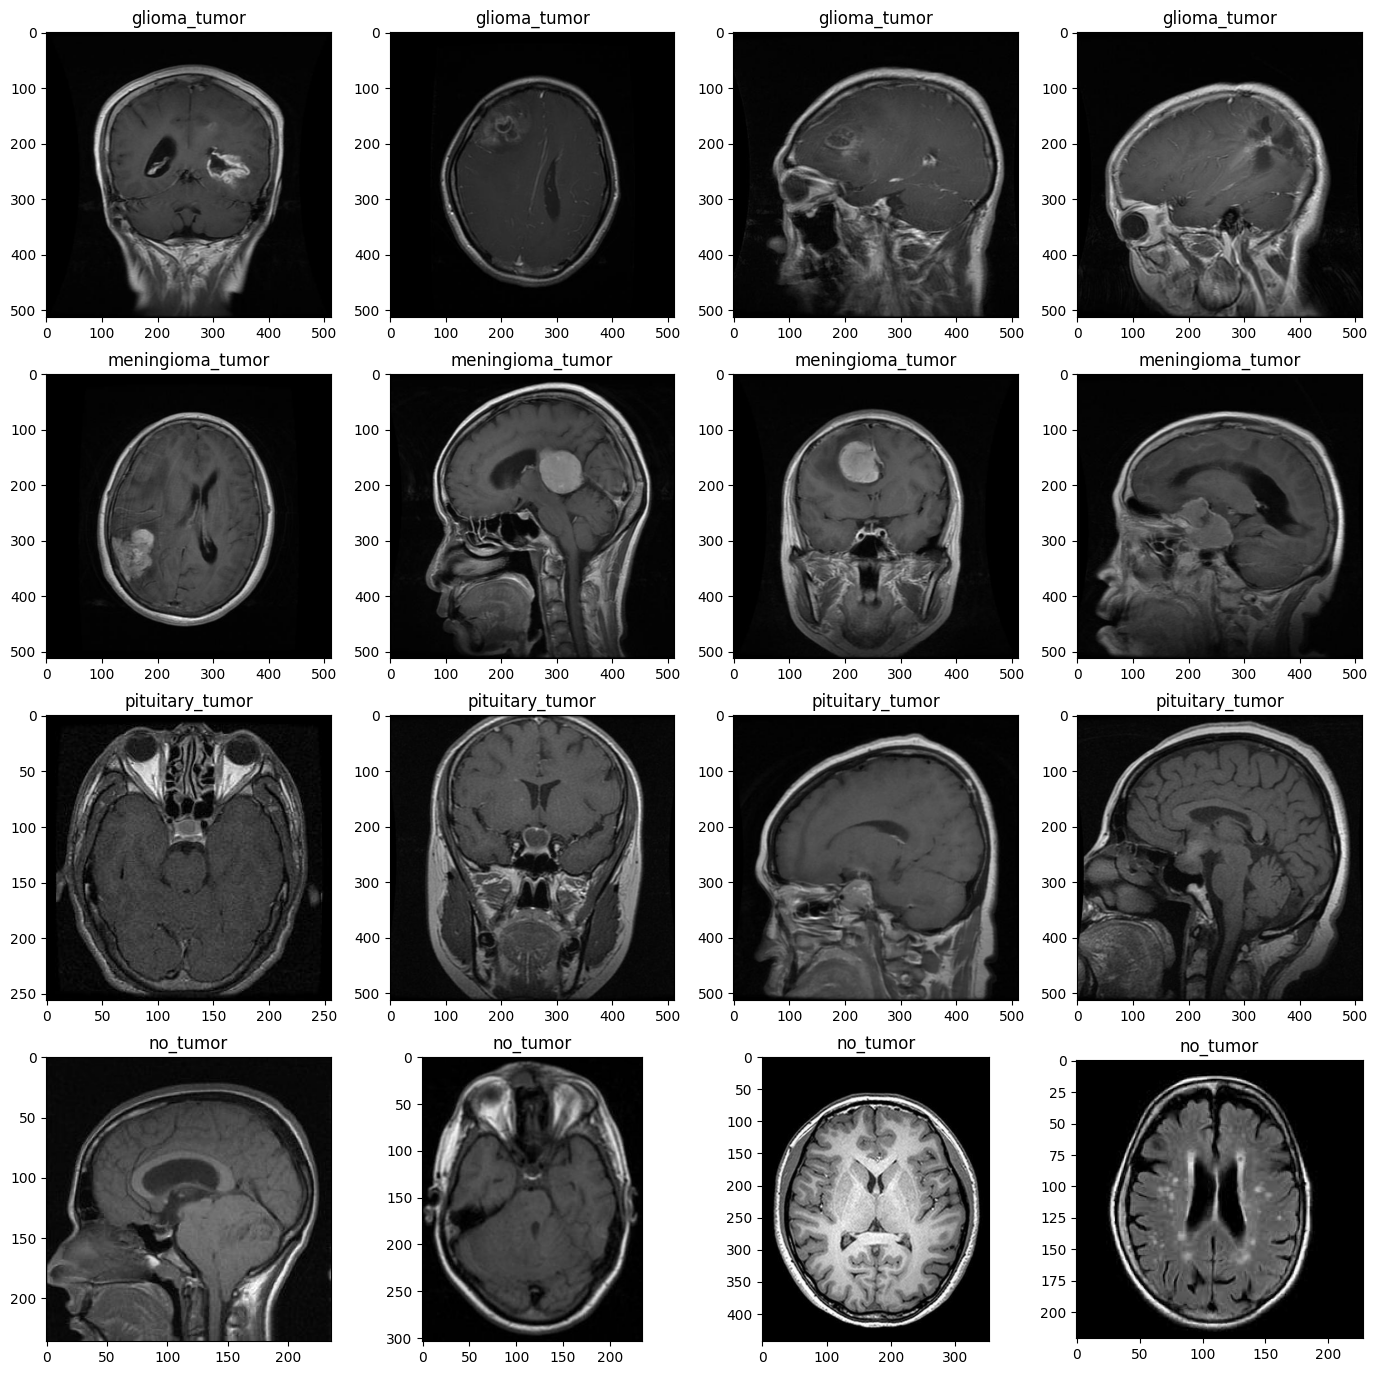

In [ ]:
import random
from tensorflow.keras.preprocessing.image import load_img # type: ignore
# visualize
plt.figure(figsize=(17, 17))
index = 0
for c in classes:
    random.shuffle(files_path_dict[c])
    path_list = files_path_dict[c][:5]

    for i in range(1, 5):
        index += 1
        plt.subplot(4, 4, index)
        plt.imshow(load_img(path_list[i]))
        plt.title(c)

Checking the distribution of types of brain tumors in the datset

Number of images in glioma_tumor = 826 

Number of images in meningioma_tumor = 822 

Number of images in no_tumor = 395 

Number of images in pituitary_tumor = 827 



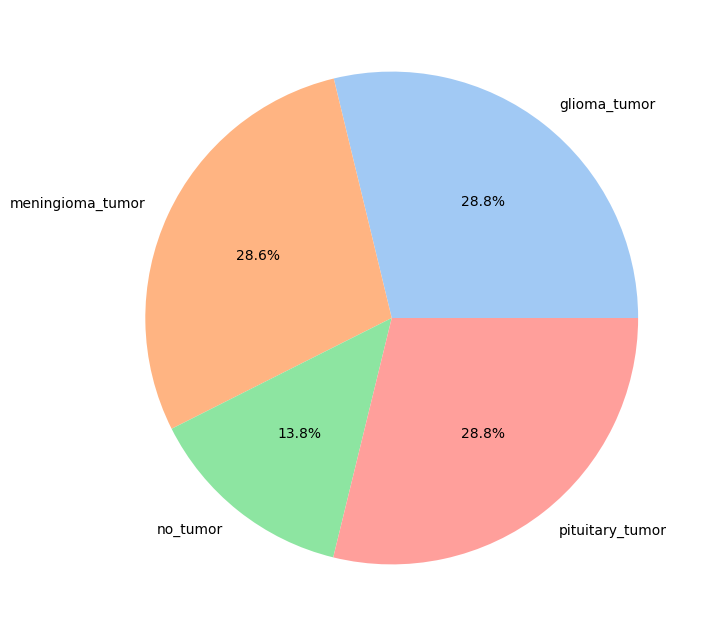

In [ ]:
# check the number of images in each class in the training dataset
No_images_per_class = []
Class_name = []

for i in os.listdir(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\dataset\Brain-MRI\Training'):
    train_class = os.listdir(os.path.join(
        r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\dataset\Brain-MRI\Training', i))
    No_images_per_class.append(len(train_class))
    Class_name.append(i)
    print('Number of images in {} = {} \n'.format(i, len(train_class)))

# visualize class distribution in train set
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
plt.pie(No_images_per_class,
        labels=Class_name,
        autopct='%1.1f%%',
        colors=colors)
plt.show()


Step 2: Preprocessing the Dataset and storing the preproccesed images in the directories created in step 1

In [ ]:
import cv2
import imutils
from tqdm import tqdm

def crop_image(image, plot=False):

    # convert to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # blur
    img_gray = cv2.GaussianBlur(img_gray, (5, 5), 0)

    # apply binary threshhold
    img_thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]

    # apply erosion
    img_thresh = cv2.erode(img_thresh, None, iterations=2)

    # dilate images
    img_thresh = cv2.dilate(img_thresh, None, iterations=2)

    # find shapes or the contour of images
    contours = cv2.findContours(
        img_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # grab contours
    contours = imutils.grab_contours(contours)

    # find biggest contour
    c = max(contours, key=cv2.contourArea)

    # extract contour positions
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # generate new image
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]

    # plot
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False,
                        right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Original Image')
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False,
                        right=False, labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        plt.title('Cropped Image')
        plt.show()

    return new_image



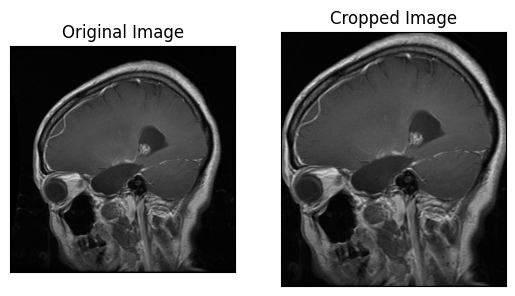

100%|██████████| 5/5 [00:00<00:00, 100.32it/s]


In [ ]:
example_image = cv2.imread(
    r'C:\Users\kapab\OneDrive\Desktop\ML Course Practice\Brain_Tumor_Clasiffication_Using_CNN\dataset\Brain-MRI\Training\glioma_tumor\gg (101).jpg')
cropped_image = crop_image(example_image, plot=True)


train_dir = r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\dataset\Brain-MRI\Training'
test_dir = r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\dataset\Brain-MRI\Testing'

# crop training images and save it to the directory we previously created
glioma = os.path.join(train_dir, 'glioma_tumor')
meningioma = os.path.join(train_dir, 'meningioma_tumor')
pituitary =os.path.join(train_dir, 'pituitary_tumor')
no_tumor = os.path.join(train_dir, 'no_tumor')

# crop training images
crop_dir = r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI'

for class_folder in [glioma, meningioma, pituitary, no_tumor]:

  class_name = os.path.basename(class_folder)
  
  j = 0

  save_dir = os.path.join(crop_dir, class_name)
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)

  for img in tqdm(os.listdir(class_folder)):
    
    path = os.path.join(class_folder, img)
    image = cv2.imread(path)
    cropped_img = crop_image(image) 

    if cropped_img is not None:

      cropped_img = cv2.resize(cropped_img, (240,240))
      
      save_path = os.path.join(save_dir, f"{j}.jpg")
      cv2.imwrite(save_path, cropped_img)
      
      j += 1
      

# crop testing images and save it to the directory we previously created
test_glioma = os.path.join(test_dir, 'glioma_tumor')
test_meningioma = os.path.join(test_dir, 'meningioma_tumor')
test_pituitary =os.path.join(test_dir, 'pituitary_tumor')
test_no_tumor = os.path.join(test_dir, 'no_tumor')

crop_dir = r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data'

for class_folder in [test_glioma, test_meningioma, test_pituitary, test_no_tumor]:

  class_name = os.path.basename(class_folder)
  
  j = 0

  save_dir = os.path.join(crop_dir, class_name)
  if not os.path.exists(save_dir):
    os.makedirs(save_dir)

  for img in tqdm(os.listdir(class_folder)):
    
    path = os.path.join(class_folder, img)
    image = cv2.imread(path)
    cropped_img = crop_image(image) 

    if cropped_img is not None:

      cropped_img = cv2.resize(cropped_img, (240,240))
      
      save_path = os.path.join(save_dir, f"{j}.jpg")
      cv2.imwrite(save_path, cropped_img)
      
      j += 1
      



Step-3 : Performing Data Augmentation using ImageDataGenerator and splitting the training images into train and validation set

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img 

train_datagen = ImageDataGenerator(
  rotation_range=10,
  height_shift_range=0.2,
  horizontal_flip=True,
  validation_split=0.2
)

test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI',
                                         target_size=(240, 240),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='training')

valid_data = train_datagen.flow_from_directory(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Crop-Brain-MRI',
                                         target_size=(240, 240),
                                         batch_size=32,
                                         class_mode='categorical',
                                         subset='validation')



test_data = test_datagen.flow_from_directory(r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data',
                                        target_size=(240, 240),
                                        class_mode='categorical',
                                        shuffle=False)


Found 2297 images belonging to 4 classes.
Found 573 images belonging to 4 classes.
Found 17 images belonging to 4 classes.


{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}
{'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


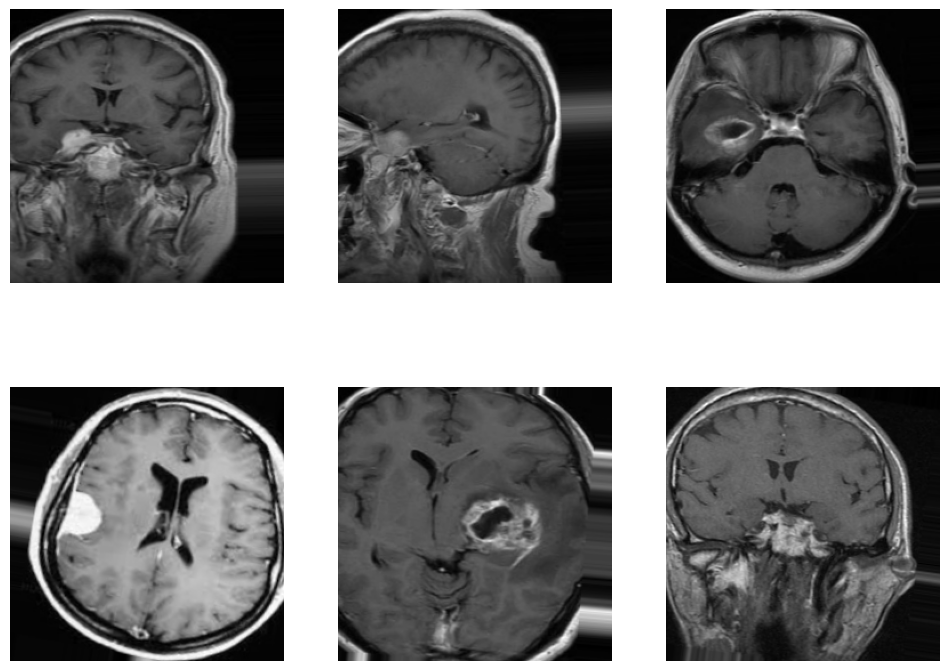

In [ ]:
# view the class dictionary
print(train_data.class_indices)
print(test_data.class_indices)
# view the augmented data
sample_x, sample_y = next(train_data)
plt.figure(figsize=(12, 9))
for i in range(6):
    plt.subplot(2, 3, i+1)
    sample = array_to_img(sample_x[i])
    plt.axis('off')
    plt.grid(False)
    plt.imshow(sample)
plt.show()


Step-4 : Building EfficientNetB1 model 

In [ ]:
from keras.models import Model
from keras.layers import Flatten, Dense, Conv2D, Dropout, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import imutils

# build the model
effnet = tf.keras.applications.EfficientNetB1(weights='imagenet',
                                              include_top=False,
                                              input_shape=(240, 240, 3))

model = effnet.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(4, activation='softmax')(model)
model = Model(inputs=effnet.input,
              outputs=model)

# get summary()
model.summary()

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 240, 240,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 240, 240,  │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 240, 240,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 240, 240,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 241, 241,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 120, 120,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 120, 120,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 120, 120,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 120, 120,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 120, 120,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 120, 120,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 120, 120,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 120, 120,  │        512 │ block1a_se_excit

 Total params: 6,580,363 (25.10 MB)

 Trainable params: 6,518,308 (24.87 MB)

 Non-trainable params: 62,055 (242.41 KB)

Step -5 : Training and Testing the Model using Transfer Learning

In [ ]:
checkpoint = ModelCheckpoint('model.keras',  
                              monitor='val_accuracy',
                              save_best_only=True,
                              mode='auto',
                              verbose=1)

In [ ]:
# early stopping
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=5,
                          mode='auto',
                          verbose=1)

# reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.3,
                              patience=2,
                              min_delta=0.001,
                              mode='auto',
                              verbose=1)
# train the model
history = model.fit(train_data,
                    epochs=30,
                    validation_data=valid_data,
                    verbose=1,
                    callbacks=[checkpoint, earlystop, reduce_lr])


Epoch 1/30


C:\Users\kapab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5377 - loss: 1.0980
Epoch 1: val_accuracy improved from -inf to 0.50785, saving model to model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 667s 7s/step - accuracy: 0.5398 - loss: 1.0942 - val_accuracy: 0.5079 - val_loss: 1.0327 - learning_rate: 1.0000e-04
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8784 - loss: 0.3630
Epoch 2: val_accuracy improved from 0.50785 to 0.77138, saving model to model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 297s 4s/step - accuracy: 0.8785 - loss: 0.3626 - val_accuracy: 0.7714 - val_loss: 0.6067 - learning_rate: 1.0000e-04
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9339 - loss: 0.2040
Epoch 3: val_accuracy improved from 0.77138 to 0.78010, saving model to model.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 452s 6s/step - accuracy: 0.9338 - loss: 0.2041 - val_accuracy: 0.7801 - val_loss: 0.5886 - learning_rate: 1.0000e-04
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9513 - loss: 0.138

We can observe that above in the process of training at epoch 18 the accuracy reached 99.53% 

In [ ]:
import cv2
from keras.models import load_model
from PIL import Image
import numpy as np

model = load_model('model.keras')
image = cv2.imread(
   r'/Users/sharlenegandham/Documents/Machine Learning/CNN_Brain_Tumor_Detection\Test-Data\glioma_tumor\0.jpg')
image = np.expand_dims(image, axis=0)
result = model.predict(image)
result = np.argmax(result)
print(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
0
